We'll now use package modules to do things more efficiently with a taper example. 

In [1]:
from config import Config
import os, sys
sys.path.append(Config.LUMERICAL_API_PATH) # if this fails adjust the config.py and add the lumerical api path
root_path = Config.ROOT_DIR

import numpy as np
import scipy as sp

import lumapi
from lumopt.utilities.wavelengths import Wavelengths
import lumopt.utilities.wavelengths as w1
from lumopt.geometries.polygon import FunctionDefinedPolygon
from lumopt.utilities.materials import Material
from lumopt.figures_of_merit.modematch import ModeMatch
from lumopt.optimization import Optimization
from lumopt.optimizers.generic_optimizers import ScipyOptimizers
from lumopt.geometries.geometry import Geometry
from lumopt_gl.geometries.geometry_gl import Geometry_GL
from lumopt_gl.optimizers.optimizer_gl import OptimizerGL
from lumopt_gl.optimization import OptimizationGL

CONFIGURATION FILE {'root': 'C:\\Program Files/Lumerical/v232/api/python', 'lumapi': 'C:/Program Files/Lumerical/v232/api/python'}


Lets define an optimization function that can take a geometry. As well as some parameters.
This time we'll use NLOpt as the optimizer, which is generally faster, more flexible, and has more algorithms. 

In [2]:
def optimizer2D(polygon, base_script, max_iter = 555):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1)

    optimizer = OptimizerGL(max_iter = max_iter, ftol = 1.0e-5, method = 'GN_ORIG_DIRECT_L', target_fom = 0.8)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=True, store_all_simulations = False)
    return opt

def optimizer3D(polygon, base_script, max_iter = 600):
    wavelengths = Wavelengths(start = 1500e-9, stop = 1600e-9, points = 11)

    fom = ModeMatch(monitor_name = 'fom',mode_number = 'fundamental TE mode', direction = 'Forward', 
                    target_T_fwd = lambda wl: np.ones(wl.size), norm_p = 1) # for 3D, we need to specify TE/TM

    optimizer = ScipyOptimizers(max_iter = 20, method = 'L-BFGS-B', scaling_factor = 1e6, pgtol = 1e-5)

    opt = OptimizationGL(base_script=base_script, wavelengths = wavelengths, fom = fom, geometry = polygon, optimizer = optimizer, 
                       use_var_fdtd=False, store_all_simulations = False, GPU = True) # and set varFDTD to False. Set GPU to True if you have one.
    return opt

The geometries folder contains several example polygons and geometries that are quite flexible with kwargs. We'll import and use the taper geometry.

In [3]:
from geometries.taper import taper_geo

taper, base_script = taper_geo(dimension=3, mesh = 2, num_params = 6)

opt = optimizer3D(taper, base_script)

Accurate interface detection enabled


In [7]:
opt.run()

Wavelength range of source object will be superseded by the global settings.


KeyboardInterrupt: 

In [14]:
from geometries.ybranch import ybranch_3D

ybr, base_script = ybranch_3D(mesh = 3, num_params = 6, poly_wg = True)

opt = optimizer3D(ybr, base_script)

KeyboardInterrupt: 

: 

In [13]:
opt.initialize()

KeyboardInterrupt: 

Wavelength range of source object will be superseded by the global settings.


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\plotter.py:19: MatplotlibDeprecationWarning: 
The 'clear_temp' parameter of setup() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. If any parameter follows 'clear_temp', they should be passed as keyword, not positionally.
  super().setup(fig, dpi, frame_prefix, clear_temp = False)


Running scipy optimizer
bounds = [[0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]
 [0.2 0.8]]
start = [0.3  0.35 0.4  0.45 0.5  0.55]
Making forward solve
Making adjoint solve
[3.0e-07 3.5e-07 4.0e-07 4.5e-07 5.0e-07 5.5e-07]
Running solves
Processing forward solve
FOM = 0.7116793625347546
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[6.99933291e-07 3.94005471e-07 2.00000000e-07 6.87692088e-07
 8.00000000e-07 8.00000000e-07]
Running solves
Processing forward solve
FOM = 0.3924593648840936
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.89468420e-07 3.59844392e-07 3.55258328e-07 5.03173707e-07
 5.67112508e-07 6.05927090e-07]
Running solves
Processing forward solve
FOM = 0.9164606763219492
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[4.41299340e-07 3.15355675e-07 3.23486037e-07 5.50621885e-07
 6.03204274e-07 6.17650411e-07]
Running solves
Processing forward solve
FOM = 0.9233601777561168
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[4.14271134e-07 3.38555152e-07 3.40054295e-07 5.25879142e-07
 5.84383545e-07 6.11537065e-07]
Running solves
Processing forward solve
FOM = 0.9430398711198005
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.83754025e-07 2.94205046e-07 3.16447714e-07 5.43825091e-07
 6.04479405e-07 5.88610464e-07]
Running solves
Processing forward solve
FOM = 0.9838266919774072
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.69673633e-07 2.57618692e-07 2.90220010e-07 5.84254147e-07
 6.43844308e-07 5.72982823e-07]
Running solves
Processing forward solve
FOM = 0.9915118561391187
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.66190377e-07 2.52305706e-07 2.77720241e-07 5.77238639e-07
 6.40221477e-07 5.63511536e-07]
Running solves
Processing forward solve
FOM = 0.9926503238611365
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.67975252e-07 2.55028163e-07 2.84125319e-07 5.80833495e-07
 6.42077872e-07 5.68364772e-07]
Running solves
Processing forward solve
FOM = 0.9926052028785487
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.67024405e-07 2.53577843e-07 2.80713176e-07 5.78918426e-07
 6.41088925e-07 5.65779333e-07]
Running solves
Processing forward solve
FOM = 0.9929711353819313
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.59663853e-07 2.55141815e-07 2.63107080e-07 5.54944126e-07
 6.28432598e-07 5.50644251e-07]
Running solves
Processing forward solve
FOM = 0.9838162602170759
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.66110843e-07 2.53771957e-07 2.78527978e-07 5.75942833e-07
 6.39518072e-07 5.63900828e-07]
Running solves
Processing forward solve
FOM = 0.992905128912413
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.66632735e-07 2.53661065e-07 2.79776320e-07 5.77642706e-07
 6.40415456e-07 5.64973965e-07]
Running solves
Processing forward solve
FOM = 0.9930700321266264
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.66527219e-07 2.53683486e-07 2.79523930e-07 5.77299025e-07
 6.40234023e-07 5.64756998e-07]
Running solves

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.64906122e-07 2.59843837e-07 2.80651752e-07 5.69584209e-07
 6.34439104e-07 5.63834691e-07]
Running solves
Processing forward solve
FOM = 0.9936219238580567
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.61967065e-07 2.66719004e-07 2.79365770e-07 5.60595131e-07
 6.27430149e-07 5.60605692e-07]
Running solves
Processing forward solve
FOM = 0.9934553761093327
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.63583885e-07 2.62936870e-07 2.80073208e-07 5.65540159e-07
 6.31285881e-07 5.62382013e-07]
Running solves
Processing forward solve
FOM = 0.9938132492566969
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.63798276e-07 2.63133955e-07 2.79659925e-07 5.66095913e-07
 6.31200200e-07 5.62914004e-07]
Running solves
Processing forward solve
FOM = 0.9938306682562518
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......


C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Making forward solve
Making adjoint solve
[3.65728072e-07 2.67651005e-07 2.77915554e-07 5.65501907e-07
 6.27034478e-07 5.66609161e-07]
Running solves
Processing forward solve
FOM = 0.9936652286851247
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.64324123e-07 2.64364800e-07 2.79184603e-07 5.65934053e-07
 6.30065089e-07 5.63920892e-07]
Running solves
Processing forward solve
FOM = 0.9937193613990415
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.63833263e-07 2.63215849e-07 2.79628299e-07 5.66085144e-07
 6.31124676e-07 5.62980996e-07]
Running solves
Processing forward solve
FOM = 0.993822136818842
Processing adjoint solve
Calculating gradients
Getting d eps: dx = 2e-09
......
Making forward solve
Making adjoint solve
[3.63800283e-07 2.63138653e-07 2.79658110e-07 5.66095295e-07
 6.31195868e-07 5.62917847e-07]
Running solves

C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\fields.py:235: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(xx*1e6, yy*1e6,np.abs(Ex**2+Ey**2+Ez**2) ,cmap=plt.get_cmap(cmap))
C:\Program Files/Lumerical/v232/api/python\lumopt\utilities\gradients.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax_gradients.pcolormesh(xx*1e6, yy*1e6, Sparse_pert, vmin=-max_val, vmax=max_val, cmap = plt.get_cmap('bwr'))


Saved frame
Number of FOM evaluations: 10
FINAL FOM = 0.9938306682562517
FINAL PARAMETERS = [3.63798276e-07 2.63133955e-07 2.79659925e-07 5.66095913e-07
 6.31200200e-07 5.62914004e-07]


(0.9938306682562517,
 array([3.63798276e-07, 2.63133955e-07, 2.79659925e-07, 5.66095913e-07,
        6.31200200e-07, 5.62914004e-07]))

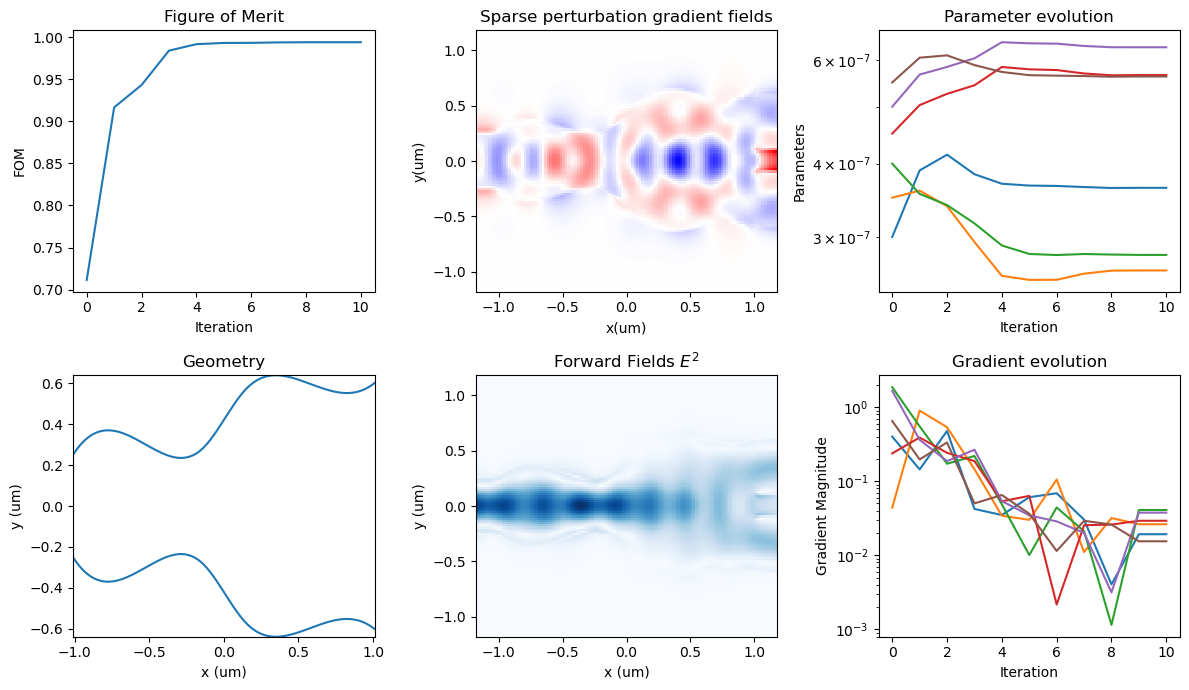

In [5]:
opt.run()

In [7]:
opt.params_hist[-1]

array([3.63798276e-07, 2.63133955e-07, 2.79659925e-07, 5.66095913e-07,
       6.31200200e-07, 5.62914004e-07])

In [8]:
opt.run_forward_simulation(params=opt.params_hist[-1])

0.9938306682562518

In [12]:
E = opt.forward_fields.E

In [13]:
E.shape

(121, 121, 1, 11, 3)

In [16]:
Ex = E[:, :, :, 0, 0]  # Extracting the Ex component
Ey = E[:, :, :, 0, 1]  # Extracting the Ey component
Ez = E[:, :, :, 0, 2]  # Extracting the Ez component

In [19]:
E_magnitude = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

In [20]:
E_magnitude

array([[[0.0025729 ],
        [0.00260711],
        [0.0026516 ],
        ...,
        [0.00265733],
        [0.00261159],
        [0.00257598]],

       [[0.00261493],
        [0.00265762],
        [0.00271284],
        ...,
        [0.00271614],
        [0.00266092],
        [0.00261779]],

       [[0.00267518],
        [0.00272742],
        [0.0027943 ],
        ...,
        [0.00279369],
        [0.00272835],
        [0.00267686]],

       ...,

       [[0.0088746 ],
        [0.00869901],
        [0.00851209],
        ...,
        [0.00860728],
        [0.00878061],
        [0.00894508]],

       [[0.00876371],
        [0.00858918],
        [0.00840558],
        ...,
        [0.00851145],
        [0.00868018],
        [0.0088423 ]],

       [[0.00865134],
        [0.00847945],
        [0.00830101],
        ...,
        [0.0084164 ],
        [0.00857894],
        [0.00873753]]])

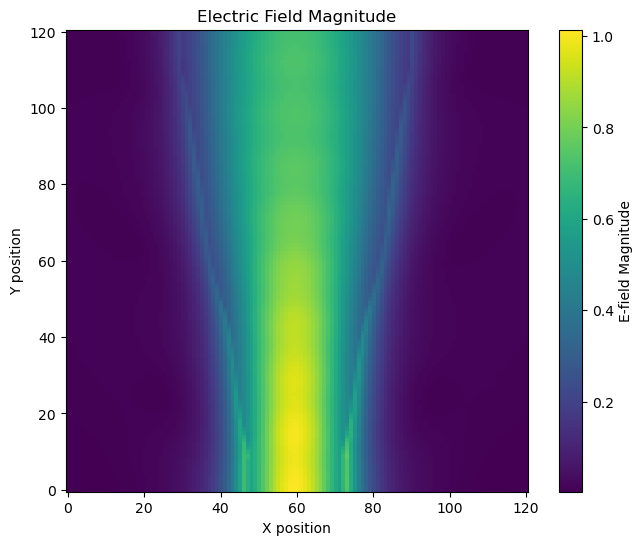

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(E_magnitude, cmap='viridis', origin='lower')
plt.colorbar(label='E-field Magnitude')
plt.title('Electric Field Magnitude')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

Lets make the taper longer now, and make it 3D. Usually doing so would require changing the base script, as the static elements such as the input and output waveguides or the FDTD monitor need to be changed accordingly. But the geometry folder examples automate this process.

Lets also make the taper type bezier. 

In [ ]:
taper, base_script = taper_geo(dimension=3, type = 'bezier', start_x = -2e-6, stop_x = 2e-6)
opt = optimizer3D(taper, base_script)

In [ ]:
opt.run()